In [172]:
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap

from plotting_helpers import highlight_k_points
from visualize_correlations import get_k_mesh, get_k_mesh_hex, calculate_tri_kspace_correlations
from helpers import load_dict


In [173]:
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 15,
    "font.family": "Helvetica"
})

column_width = 3.75
square_fig_size=(2*column_width,3/2*column_width)
bigger_font_size=22


In [174]:
rate_markers={0.158:'*',0.25:'H',0.475:'^'}
rate_lines={0.158:':',0.25:'--',0.475:'-'}
rate_alphas={0.475:0.2,0.25:0.5,0.158:0.9}

colorscale_sq = plt.get_cmap('plasma')
colorscale_tri = plt.get_cmap('viridis')
scales = [1.,2.,4.]
shades = np.linspace(0.,0.9,2*len(scales))[::-2]
colors_sq = colorscale_sq(shades)
colors_tri = colorscale_tri(shades)
scale_shades = {'Square':{1.0:colors_sq[-3],2.0:colors_sq[-2],4.0:colors_sq[-1]},
                'Triangular':{1.0:colors_tri[-3],2.0:colors_tri[-2],4.0:colors_tri[-1]}}

# PBC

PLEASE NOTE: final_correlations_data.pkl is too large to host on git. If you would like to reproduce these figures, please reach out to me at msmoss@uwaterloo.ca and I can share this file with you.

In [175]:
pbc_data = load_dict('./plotting_data/final_correlations_data.pkl')
pbc_lotting_data = load_dict('./plotting_data/final_correlations_data_plotting.pkl')


In [199]:
L=12
scale=4.0
rate=0.158
best_corrs = pbc_data['TriangularMS,periodicBC'][f'scale={scale},rate={rate},T=1.00'][f'L={L}']
best_corrs_allL = pbc_lotting_data['TriangularMS,periodicBC'][f'scale={scale},rate={rate},T=1.00']


In [200]:
pbc_color=scale_shades['Triangular'][scale]
color_n = 256
vals = np.ones((color_n, 4))
vals[:, 0] = np.linspace(pbc_color[0], 1, color_n)[::-1]
vals[:, 1] = np.linspace(pbc_color[1], 1, color_n)[::-1]
vals[:, 2] = np.linspace(pbc_color[2], 1, color_n)[::-1]
pbc_cmap = ListedColormap(vals)

### For $M^2$ scaling plot

144 spins
Peak in recipricol space = 8.219863807425968


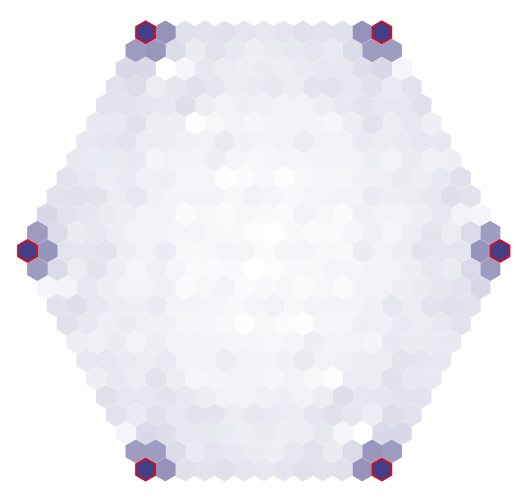

In [201]:
fig, axs = plt.subplots(figsize=square_fig_size)

use_zz = False
show_colorbar = False

N = L**2
print(f"{N} spins")

if 'Sz' in best_corrs.keys():

    kpointsx,kpointsy = get_k_mesh_hex(L)

    if use_zz:
        rnn_Sij = 3*best_corrs['Sz']
    else:
        rnn_Sij = best_corrs['Sz'] + best_corrs['Sxy']

    Sk = calculate_tri_kspace_correlations(L, rnn_Sij, kpointsx, kpointsy, periodic=True, reorder=True)
    peak_value = np.max(Sk)
    print(f"Peak in recipricol space = {peak_value}")
    corrs = Sk.flatten()

    marker_size = 3.65*markersize / N
    sc = axs.scatter(kpointsx, kpointsy, marker='h',s=marker_size, c=corrs, cmap=pbc_cmap,)

    highlight_k_points(axs,marker_size=marker_size)   
     
    axs.set_ylim(-4,4)
    axs.set_xlim(-4.5,4.5)
    axs.set_box_aspect(0.95)
    if show_colorbar:
        cbar = plt.colorbar(sc, pad=0.02) 
        cbar.ax.tick_params(labelsize=1.3*bigger_font_size) 

plt.tight_layout()

axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
axs.spines['bottom'].set_visible(False)
axs.spines['left'].set_visible(False)
axs.set_xticks([])
axs.set_yticks([])

filename = f'k_space_corrs_N{N}_pbc_scale{scale}_rate{rate}'
if show_colorbar:
    filename += '_wcbar'
plt.savefig('./final_figures/'+filename+'.pdf',bbox_inches='tight',pad_inches=0.1,transparent=True)

plt.show()

# OBC

In [179]:
Ls_even = np.arange(6,20,2)
Ls_comm = np.arange(6,20,6)

# even
even_color='grey'
even = load_dict('./plotting_data/obc_even_data.pkl')
even_marker='s'
even_ms = 7
# comm
comm_color=scale_shades['Square'][2.0]
comm = load_dict('./plotting_data/obc_comm_data.pkl')
comm_marker='s'
comm_ms = 7
# tri
trims_color=scale_shades['Triangular'][2.0]
tri = load_dict('./plotting_data/obc_tri_data.pkl')
trims_marker='^'
trims_ms = 7


In [180]:
which_corrs='TriMS'
if which_corrs=='TriMS':
    color=trims_color
    marker=trims_marker
    markersize=trims_ms
    reorder=True
    obc_data = tri
elif which_corrs=='comm':
    color=comm_color
    marker=comm_marker
    markersize=comm_ms
    reorder=False
    obc_data = comm
else:
    color=mcolors.to_rgba(even_color)
    marker=even_marker
    markersize=even_ms
    reorder=False
    obc_data = even


In [181]:
N = 256
vals = np.ones((N, 4))
vals[:, 0] = np.linspace(color[0], 1, N)[::-1]
vals[:, 1] = np.linspace(color[1], 1, N)[::-1]
vals[:, 2] = np.linspace(color[2], 1, N)[::-1]
newcmp = ListedColormap(vals)

### Look at all system sizes

36 spins
144 spins
324 spins


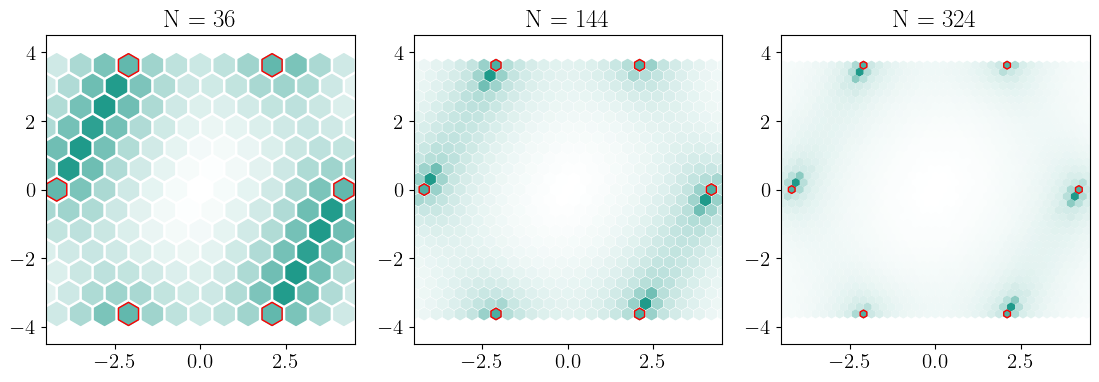

In [182]:
fig, axs = plt.subplots(1,3,figsize=(column_width*3,column_width))

p1 = (1., 0.)
p2 = (-1./2, np.sqrt(3)/2)

use_zz = False

for i, L in enumerate(Ls_comm[:]):    
    N = L**2
    print(f"{N} spins")

    if 'Sz' in obc_data[which_corrs][f"L={L}"].keys():

        kpointsx,kpointsy = get_k_mesh(L)
        if use_zz:
            rnn_Sij = 3*obc_data[which_corrs][f"L={L}"]['Sz']
        else:
            rnn_Sij = obc_data[which_corrs][f"L={L}"]['Sz'] + obc_data[which_corrs][f"L={L}"]['Sxy']

        Sk = calculate_tri_kspace_correlations(L, rnn_Sij, kpointsx, kpointsy, p1, p2, periodic=False, reorder=reorder)
        corrs = Sk.flatten()

        markersize=10000
        marker_size = markersize / N
        sc = axs[i].scatter(kpointsx, kpointsy, marker='h',s=marker_size, c=corrs, cmap=newcmp,)

        highlight_k_points(axs[i],marker_size=marker_size)
        
        axs[i].set_title(f'N = {N}')
        axs[i].set_ylim(-4.5,4.5)
        axs[i].set_xlim(-4.5,4.5)
        axs[i].set_box_aspect(1)
            
plt.tight_layout()
plt.show()

### For $M^2$ scaling plot

324 spins


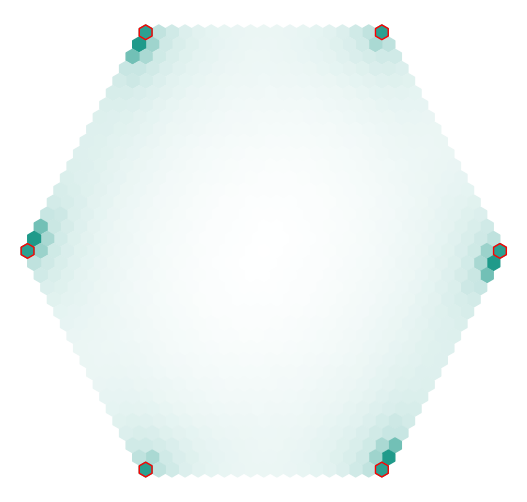

In [183]:
fig, axs = plt.subplots(figsize=square_fig_size)

use_zz = False
show_colorbar = False

L=18
N = L**2
print(f"{N} spins")

if 'Sz' in obc_data[which_corrs][f"L={L}"].keys():

    kpointsx,kpointsy = get_k_mesh_hex(L)
    if use_zz:
        rnn_Sij = 3*obc_data[which_corrs][f"L={L}"]['Sz']
    else:
        rnn_Sij = obc_data[which_corrs][f"L={L}"]['Sz'] + obc_data[which_corrs][f"L={L}"]['Sxy']

    Sk = calculate_tri_kspace_correlations(L, rnn_Sij, kpointsx, kpointsy, periodic=False, reorder=reorder)
    corrs = Sk.flatten()

    marker_size = 3.65*markersize / N
    norm = mpl.colors.Normalize(vmin=0, vmax=peak_value)
    sc = axs.scatter(kpointsx, kpointsy, marker='h',s=marker_size, c=corrs, norm=norm, cmap=newcmp,)

    highlight_k_points(axs,marker_size=marker_size)   
     
    axs.set_ylim(-4,4)
    axs.set_xlim(-4.5,4.5)
    axs.set_box_aspect(0.95)
    if show_colorbar:
        cbar = plt.colorbar(sc, pad=0.02) 
        cbar.ax.tick_params(labelsize=1.3*bigger_font_size) 

plt.tight_layout()

axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
axs.spines['bottom'].set_visible(False)
axs.spines['left'].set_visible(False)
axs.set_xticks([])
axs.set_yticks([])

filename = f'k_space_corrs_N{N}_{which_corrs}'
if show_colorbar:
    filename += '_wcbar'
plt.savefig('./final_figures/'+filename+'.pdf',bbox_inches='tight',pad_inches=0.1,transparent=True)

plt.show()

### Subsampling the correlations

324 spins, 324 spins in bulk
0.030690903476125853


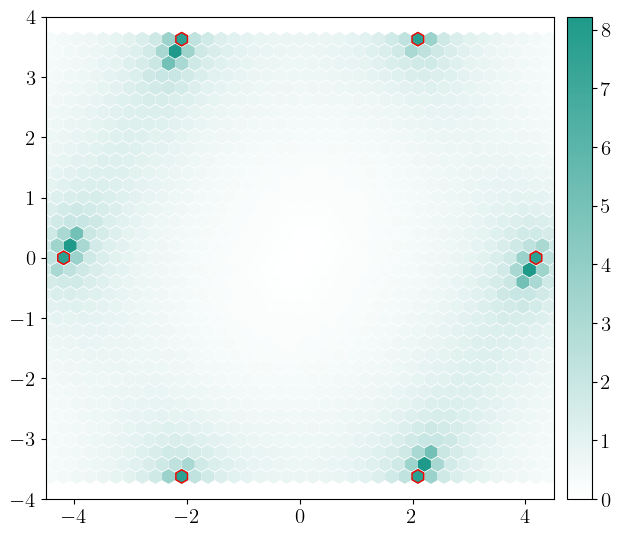

324 spins, 196 spins in bulk
0.0398484496593515


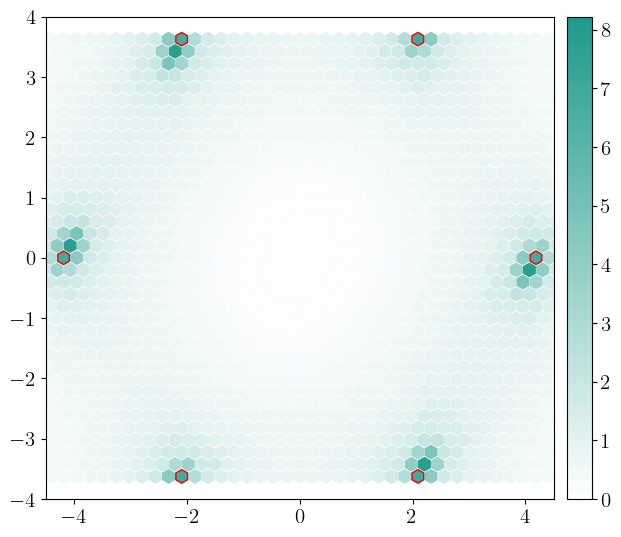

324 spins, 100 spins in bulk
0.051188841524220347


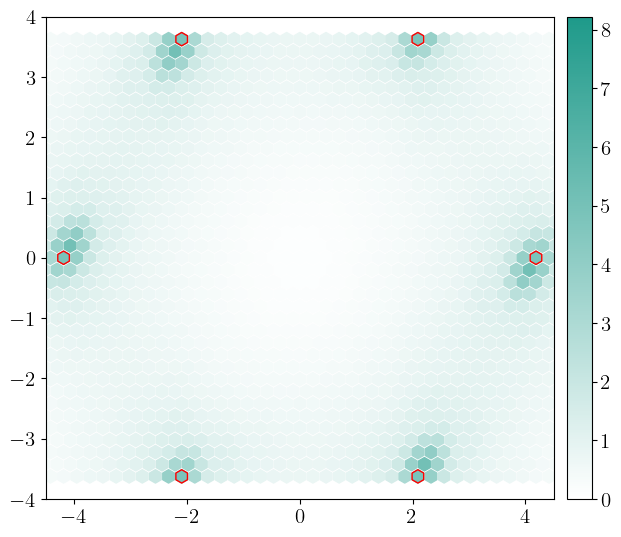

In [184]:
use_zz = False

L=18
for boundary in [0,2,4]:
    fig, axs = plt.subplots(figsize=square_fig_size)

    L_bulk=L-(2*boundary)
    N = L**2
    print(f"{N} spins, {L_bulk**2} spins in bulk")

    if 'Sz' in obc_data[which_corrs][f"L={L}"].keys():

        kpointsx,kpointsy = get_k_mesh(L)
        if use_zz:
            rnn_Sij = 3*obc_data[which_corrs][f"L={L}"]['Sz']
        else:
            rnn_Sij = obc_data[which_corrs][f"L={L}"]['Sz'] + obc_data[which_corrs][f"L={L}"]['Sxy']

        Sk = calculate_tri_kspace_correlations(L, rnn_Sij, kpointsx, kpointsy, periodic=False, reorder=reorder, boundary_size=boundary)
        corrs = Sk.flatten()
        print(max(corrs)/L_bulk**2)

        marker_size = 3*markersize / N
        norm = mpl.colors.Normalize(vmin=0, vmax=peak_value)
        sc = axs.scatter(kpointsx, kpointsy, marker='h',s=marker_size, c=corrs, norm=norm, cmap=newcmp,)

        highlight_k_points(axs,marker_size=marker_size)   
        
        axs.set_ylim(-4,4)
        axs.set_xlim(-4.5,4.5)
        axs.set_box_aspect(0.95)
        plt.colorbar(sc, pad=0.02) 
                
    plt.tight_layout()

    plt.show()

In [185]:
for og_boundary in [0,1,2]:
    for L_i,L in enumerate([6,12,18]):
        boundary = og_boundary
        L_bulk=L-(2*boundary)
        N = L**2
        print(f"{N} spins, {L_bulk**2} spins in bulk")

        if 'Sz' in obc_data[which_corrs][f"L={L}"].keys():

            kpointsx,kpointsy = get_k_mesh(L)
            rnn_Sij = obc_data[which_corrs][f"L={L}"]['Sz'] + obc_data[which_corrs][f"L={L}"]['Sxy']

            all_Sk = calculate_tri_kspace_correlations(L, rnn_Sij, kpointsx, kpointsy, periodic=False, reorder=reorder, boundary_size=boundary)
            Sk,_ = calculate_structure_factor(L,rnn_Sij,periodic=False,reorder=reorder,boundary_size=boundary)
            if (L==6) and (which_corrs=='even'):
                obc_data[which_corrs][f"L={L}"][f'Sk boundary={og_boundary}'] = (Sk/L_bulk**2)/4
                obc_data[which_corrs][f"L={L}"][f'Sk (peak) boundary={og_boundary}'] = (max(all_Sk)/L_bulk**2)/4
            else:
                obc_data[which_corrs][f"L={L}"][f'Sk boundary={og_boundary}'] = (Sk/L_bulk**2)
                obc_data[which_corrs][f"L={L}"][f'Sk (peak) boundary={og_boundary}'] = (max(all_Sk)/L_bulk**2)


36 spins, 36 spins in bulk
144 spins, 144 spins in bulk
324 spins, 324 spins in bulk
36 spins, 16 spins in bulk
144 spins, 100 spins in bulk
324 spins, 256 spins in bulk
36 spins, 4 spins in bulk
144 spins, 64 spins in bulk
324 spins, 196 spins in bulk


In [186]:
def second_order(x, m1, m2, M_inf_sq):
    return M_inf_sq + m1 * x + m2 * x**2

/Users/megan/miniconda3/envs/HeisenbergRNN/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/megan/miniconda3/envs/HeisenbergRNN/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/megan/miniconda3/envs/HeisenbergRNN/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/megan/miniconda3/envs/HeisenbergRNN/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


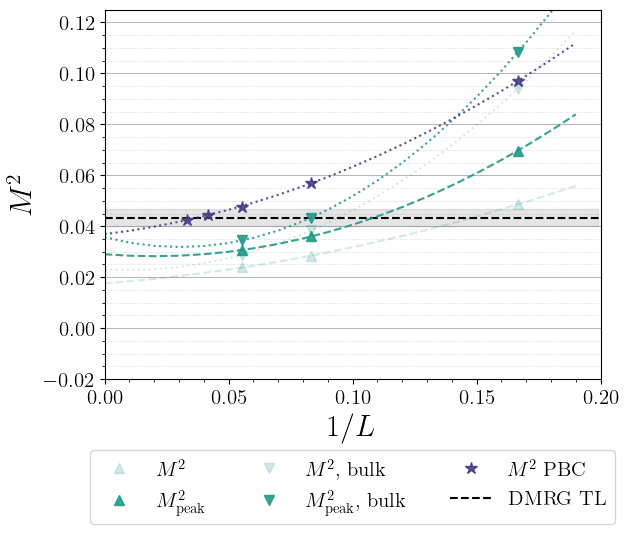

In [188]:
fig, ax = plt.subplots()
boundary = 1
x_mesh = np.arange(0,0.2,0.01)

plot_x = []
plot_y = []
plot_y_peak = []
plot_y_boundary = []
plot_y_boundary_peak = []
for l in Ls_comm[:]:
    if 'Sk' in obc_data[which_corrs][f"L={l}"].keys():
        plot_x.append(1/l)
        plot_y.append(obc_data[which_corrs][f"L={l}"]['Sk'])
        plot_y_peak.append(obc_data[which_corrs][f"L={l}"][f'Sk (peak) boundary=0'])
        plot_y_boundary.append(obc_data[which_corrs][f"L={l}"][f'Sk boundary={boundary}'])
        plot_y_boundary_peak.append(obc_data[which_corrs][f"L={l}"][f'Sk (peak) boundary={boundary}'])

ax.errorbar(plot_x,plot_y,fmt='o',
            marker=marker,markersize=trims_ms,color=color,alpha=0.2,label=f'$M^2$')  
params, covariance = curve_fit(second_order, plot_x, plot_y)
ax.plot(x_mesh,second_order(x_mesh,params[0],params[1],params[2]),
        color=trims_color,alpha=0.2,linestyle='--')

ax.errorbar(plot_x,plot_y_peak,fmt='o',
            marker=marker,markersize=trims_ms,color=color,alpha=0.9,label=r'$M^2_{\mathrm{peak}}$')  
params, covariance = curve_fit(second_order, plot_x, plot_y_peak)
ax.plot(x_mesh,second_order(x_mesh,params[0],params[1],params[2]),
        color=trims_color,alpha=0.9,linestyle='--')

ax.errorbar(plot_x,plot_y_boundary,fmt='o',
            marker='v',markersize=trims_ms,color=color,alpha=0.2,label=f'$M^2$, bulk')  
params, covariance = curve_fit(second_order, plot_x, plot_y_boundary)
ax.plot(x_mesh,second_order(x_mesh,params[0],params[1],params[2]),
        color=trims_color,alpha=0.2,linestyle=':')

ax.errorbar(plot_x,plot_y_boundary_peak,fmt='o',
            marker='v',markersize=trims_ms,color=color,alpha=0.9,label=r'$M^2_{\mathrm{peak}}$, bulk')  
params, covariance = curve_fit(second_order, plot_x, plot_y_boundary_peak)
ax.plot(x_mesh,second_order(x_mesh,params[0],params[1],params[2]),
        color=trims_color,alpha=0.9,linestyle=':')


pbc_x = 1/best_corrs_allL['ls']
pbc_y = best_corrs_allL['Sk from SiSj']/best_corrs_allL['ls']**2
ax.errorbar(pbc_x,pbc_y,fmt='o',
            marker='*',markersize=9,color=scale_shades['Triangular'][4.0], alpha=0.9, label=f'$M^2$ PBC')  
params, covariance = curve_fit(second_order, pbc_x, pbc_y)
ax.plot(x_mesh,second_order(x_mesh,params[0],params[1],params[2]),
        color=scale_shades['Triangular'][4.0],alpha=0.9,linestyle=':')

## Literature values
# ax.hlines(0,0,0.2,color='k',linestyle='-')
# ax.hlines(0.205**2,0,0.2,color='k',alpha=0.4,linestyle='--',label='GFMC')
# ax.hlines(0.25**2,0,0.2,color='k',alpha=0.7,linestyle='--',label='ED')
ax.hlines(0.208**2,0,0.2,color='k',alpha=1,linestyle='--',label='DMRG TL')
ax.fill_between(np.arange(0,0.2,0.001),(0.208-0.008)**2,(0.208+0.008)**2,color='grey',alpha=0.2)

add_gridlines(axes='y')

ax.set_xlabel(r'$1/L$',fontsize=22)
ax.set_ylabel(r'$M^2$',fontsize=22)
ax.set_xlim(0,.2)
ax.set_ylim(-0.02,0.125)
# ax.set_title(f"size of boundary $={boundary}$")

handles, labels = ax.get_legend_handles_labels()
order = np.roll(np.arange(len(handles)),shift=len(handles)-1)
ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order],ncol=3,loc='lower center',bbox_to_anchor=(0.5,-0.42))

filename = 'M_scaling_open_bulk'
plt.savefig('./final_figures/'+filename+'.pdf',bbox_inches='tight',pad_inches=0.1)

plt.show()